In [ ]:
import pandas as pd
import numpy as np

from glob import glob
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [ ]:
import os
ds_train = train_df('/content/gdrive/My Drive/projet 2/dataset/dataset1/Training')
ds_test = test_df('/content/gdrive/My Drive/projet 2/dataset/dataset1/Testing')

In [ ]:
ds_train

,Class Path,Class
0,/content/gdrive/My Drive/projet 2/dataset/data...,notumor
1,/content/gdrive/My Drive/projet 2/dataset/data...,notumor
2,/content/gdrive/My Drive/projet 2/dataset/data...,notumor
3,/content/gdrive/My Drive/projet 2/dataset/data...,notumor
4,/content/gdrive/My Drive/projet 2/dataset/data...,notumor
...,...,...
5707,/content/gdrive/My Drive/projet 2/dataset/data...,glioma
5708,/content/gdrive/My Drive/projet 2/dataset/data...,glioma
5709,/content/gdrive/My Drive/projet 2/dataset/data...,glioma
5710,/content/gdrive/My Drive/projet 2/dataset/data...,glioma


In [ ]:
ds_test

,Class Path,Class
0,/content/gdrive/My Drive/projet 2/dataset/data...,notumor
1,/content/gdrive/My Drive/projet 2/dataset/data...,notumor
2,/content/gdrive/My Drive/projet 2/dataset/data...,notumor
3,/content/gdrive/My Drive/projet 2/dataset/data...,notumor
4,/content/gdrive/My Drive/projet 2/dataset/data...,notumor
...,...,...
1311,/content/gdrive/My Drive/projet 2/dataset/data...,pituitary
1312,/content/gdrive/My Drive/projet 2/dataset/data...,pituitary
1313,/content/gdrive/My Drive/projet 2/dataset/data...,pituitary
1314,/content/gdrive/My Drive/projet 2/dataset/data...,pituitary


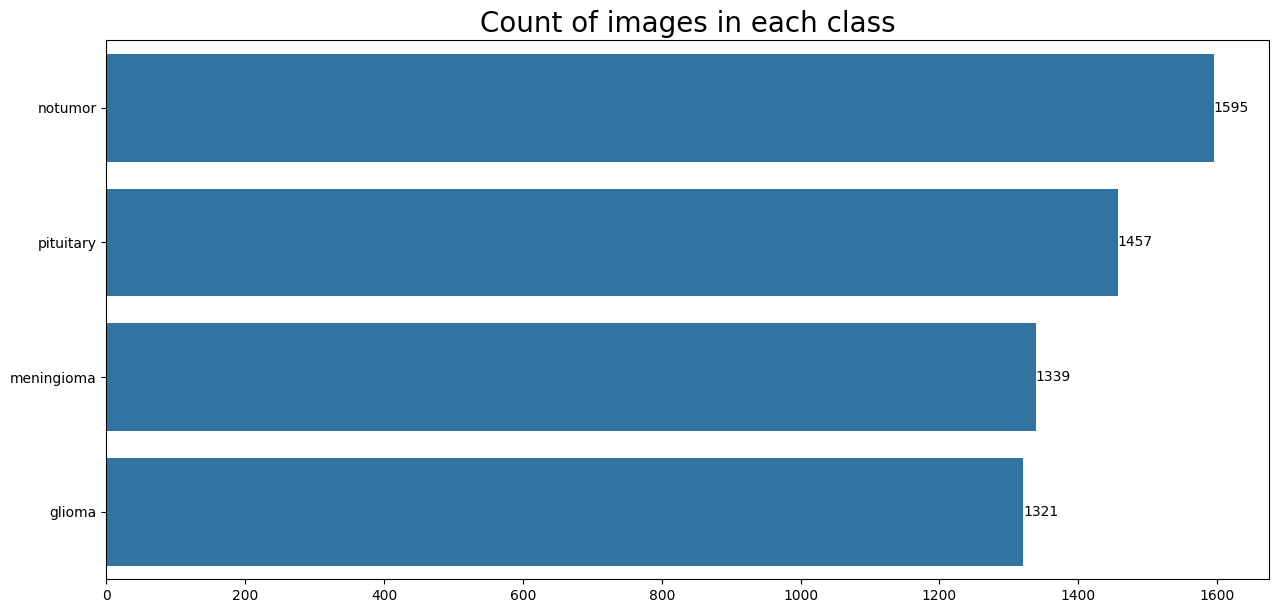

In [ ]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ds_train , y=ds_train['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

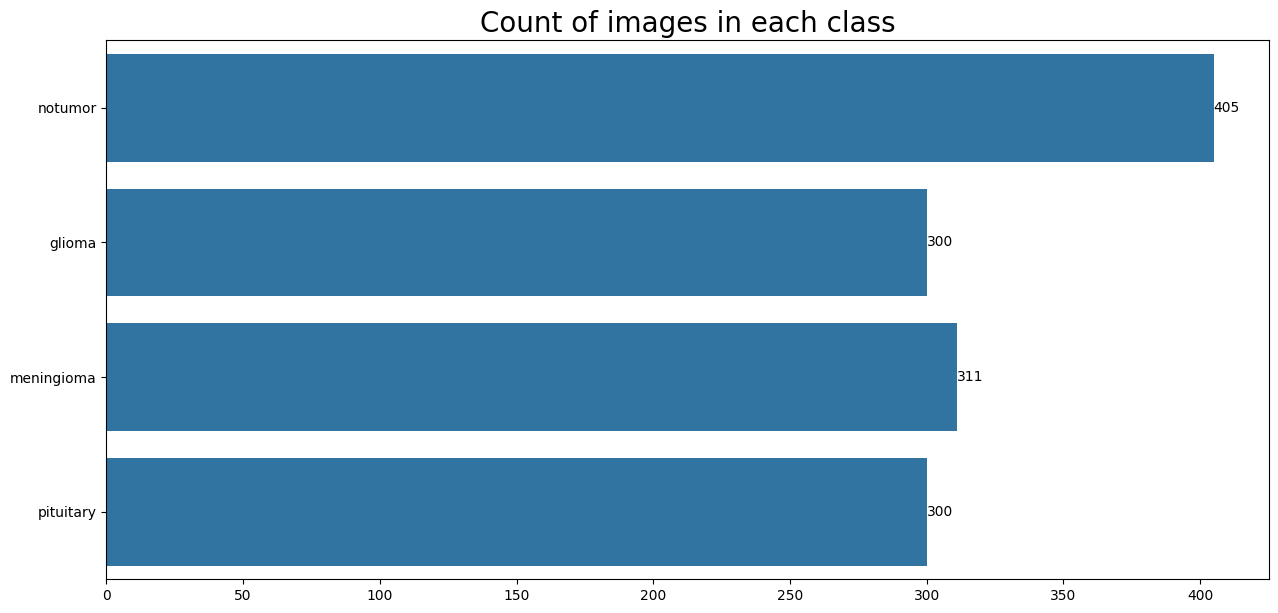

In [ ]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ds_test , y=ds_test['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:

def count_file_types(directory):
    file_counts = {}
    for root, _, files in os.walk(directory):
        for file in files:
            file_type = os.path.splitext(file)[1]
            file_counts[file_type] = file_counts.get(file_type, 0) + 1
    return file_counts

# Paths to your datasets
train_dir = "/content/gdrive/MyDrive/projet 2/dataset/dataset1/Training"
test_dir = "/content/gdrive/MyDrive/projet 2/dataset/dataset1/Testing"

print("Training file types:", count_file_types(train_dir))
print("Testing file types:", count_file_types(test_dir))


Training file types: {'.jpg': 5712}
Testing file types: {'.jpg': 1316}


In [ ]:
ds_valid, ts_df = train_test_split(ds_test, train_size=0.5, random_state=20, stratify=ds_test['Class'])

In [ ]:
ds_valid

,Class Path,Class
861,/content/gdrive/My Drive/projet 2/dataset/data...,meningioma
79,/content/gdrive/My Drive/projet 2/dataset/data...,notumor
1083,/content/gdrive/My Drive/projet 2/dataset/data...,pituitary
1084,/content/gdrive/My Drive/projet 2/dataset/data...,pituitary
5,/content/gdrive/My Drive/projet 2/dataset/data...,notumor
...,...,...
464,/content/gdrive/My Drive/projet 2/dataset/data...,glioma
4,/content/gdrive/My Drive/projet 2/dataset/data...,notumor
678,/content/gdrive/My Drive/projet 2/dataset/data...,glioma
904,/content/gdrive/My Drive/projet 2/dataset/data...,meningioma


In [ ]:
#import tensorflow as tf
#print(tf.__version__)

In [ ]:
#pip install tensorflow==2.12.0


In [ ]:
#pip install tensorflow-addons

In [ ]:
#!pip install --upgrade tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Parameters
batch_size = 32
target_size = (299, 299)  # Target size for ResNet-50
rescale_factor = 1.0 / 255.0  # Normalize pixel values to [0, 1]

# Define the ImageDataGenerator for training (with augmentation) and testing (without augmentation)
train_datagen = ImageDataGenerator(
    rescale=1/255,

    brightness_range=(0.8, 1.2),  # Random brightness
)

test_datagen = ImageDataGenerator(rescale=1/255)


train_gen = train_datagen.flow_from_dataframe(
    dataframe=ds_train,
    x_col="Class Path",
    y_col="Class",
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=ds_test,
    x_col="Class Path",
    y_col="Class",
    target_size=target_size,
    batch_size=16,
    class_mode="categorical",
    shuffle=False
)

valid_gen = test_datagen.flow_from_dataframe(
    dataframe=ds_valid,
    x_col="Class Path",
    y_col="Class",
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 5712 validated image filenames belonging to 4 classes.
Found 1316 validated image filenames belonging to 4 classes.
Found 658 validated image filenames belonging to 4 classes.


In [ ]:
# class_dict = train_gen.class_indices
# classes = list(class_dict.keys())
# images, labels = next(train_gen)
# plt.figure(figsize=(10, 10))
# for i, (image, label) in enumerate(zip(images, labels)):
#     plt.subplot(4,4, i + 1)
#     plt.imshow(image)
#     class_name = classes[np.argmax(label)]
#     plt.title(class_name, color='k', fontsize=15)
# plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.applications import Xception
from tensorflow.keras.metrics import Precision, Recall


In [ ]:
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

# for layer in base_model.layers:
#     layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])

model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

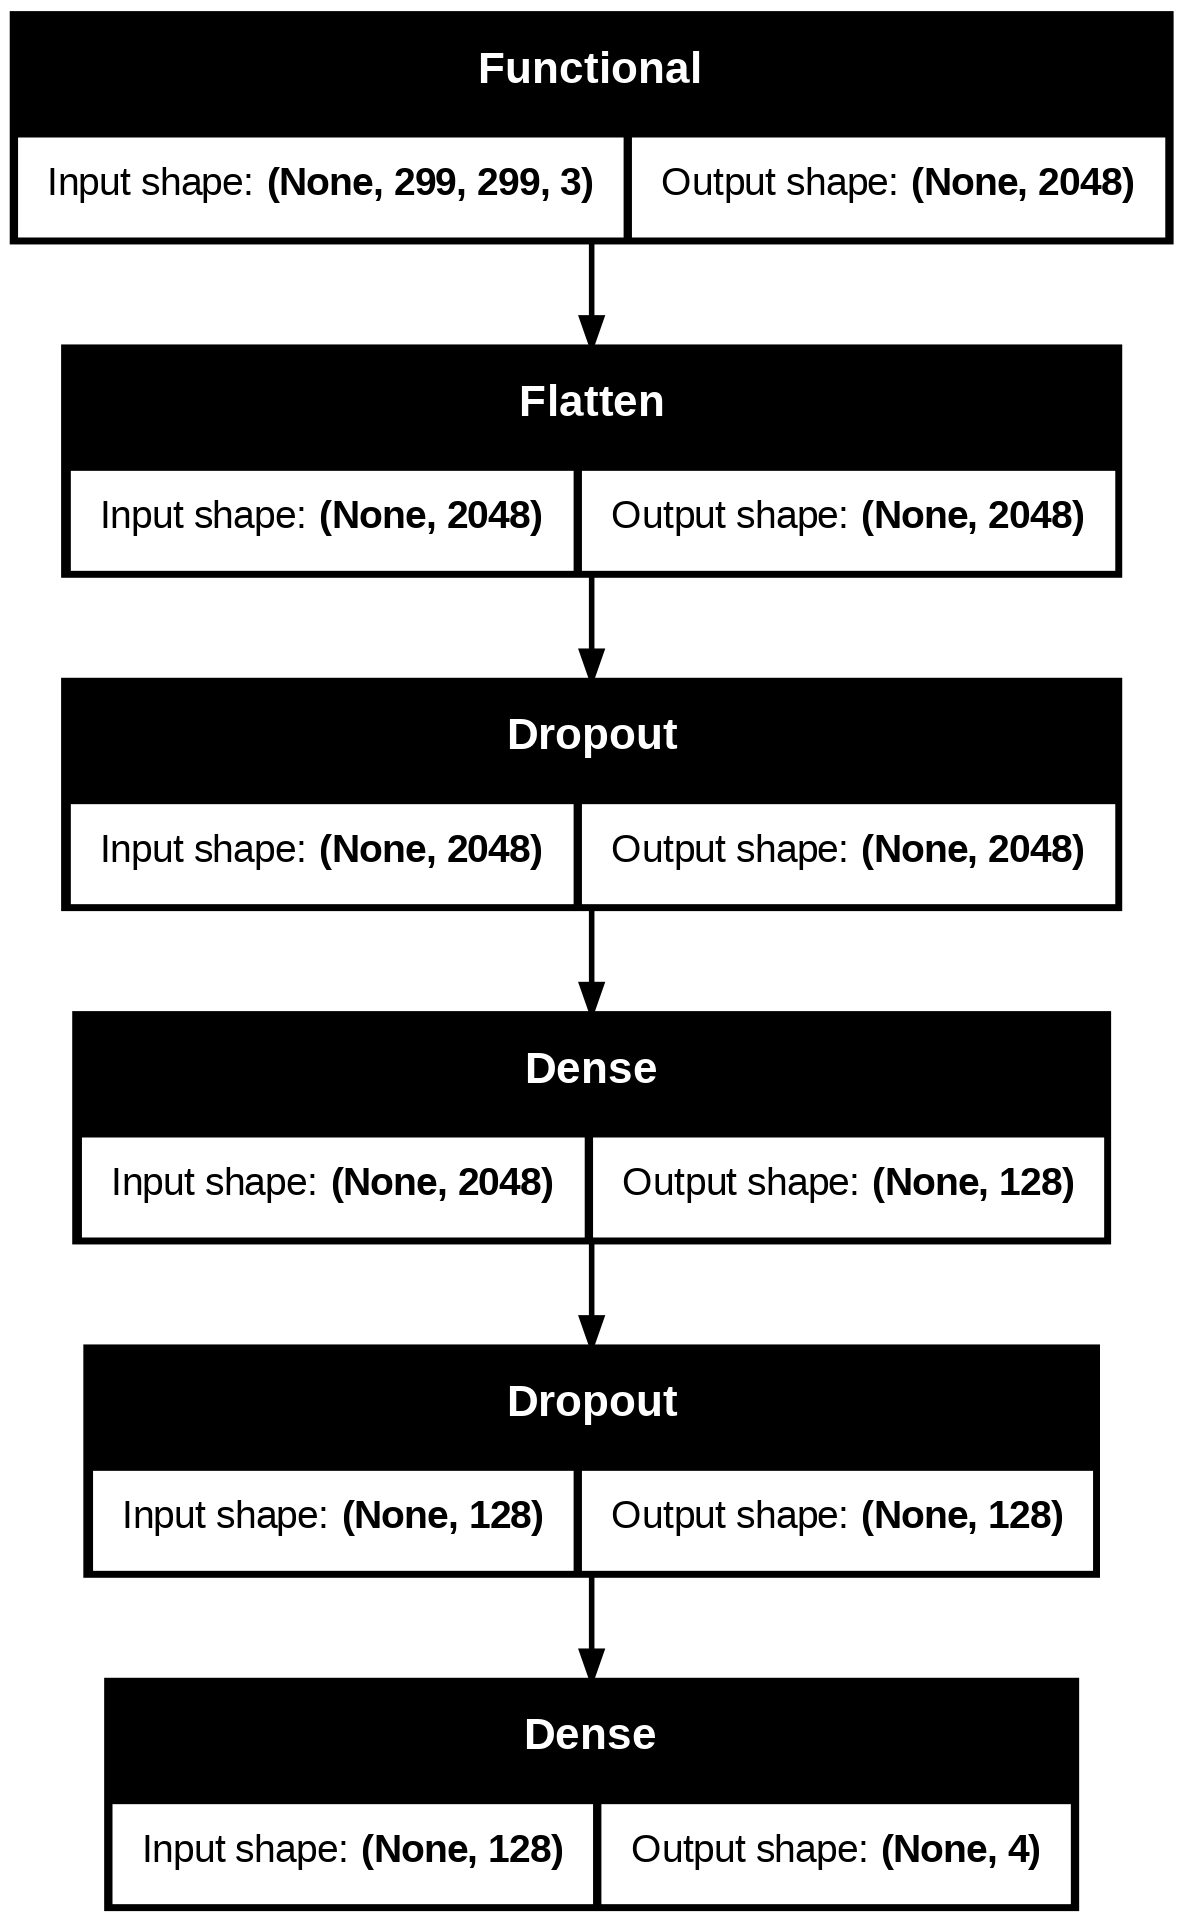

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#!pip install --upgrade tensorflow

In [ ]:
hist = model.fit(train_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 4155s 23s/step - accuracy: 0.7848 - loss: 0.6106 - precision: 0.8466 - recall: 0.6735 - val_accuracy: 0.9407 - val_loss: 0.1841 - val_precision: 0.9407 - val_recall: 0.9407
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 146s 816ms/step - accuracy: 0.9809 - loss: 0.0602 - precision: 0.9829 - recall: 0.9789 - val_accuracy: 0.9742 - val_loss: 0.0930 - val_precision: 0.9741 - val_recall: 0.9726
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 200s 805ms/step - accuracy: 0.9943 - loss: 0.0227 - precision: 0.9955 - recall: 0.9938 - val_accuracy: 0.9863 - val_loss: 0.0670 - val_precision: 0.9863 - val_recall: 0.9863
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 152s 849ms/step - accuracy: 0.9932 - loss: 0.0163 - precision: 0.9934 - recall: 0.9931 - val_accuracy: 0.9802 - val_loss: 0.0976 - val_precision: 0.9817 - val_recall: 0.9787
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 154s 859ms/step - accuracy: 0.9980 - loss: 0.0083 - precision: 0.9980 - recall: 0.9978 - val_accuracy: 0.9924 - val_

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

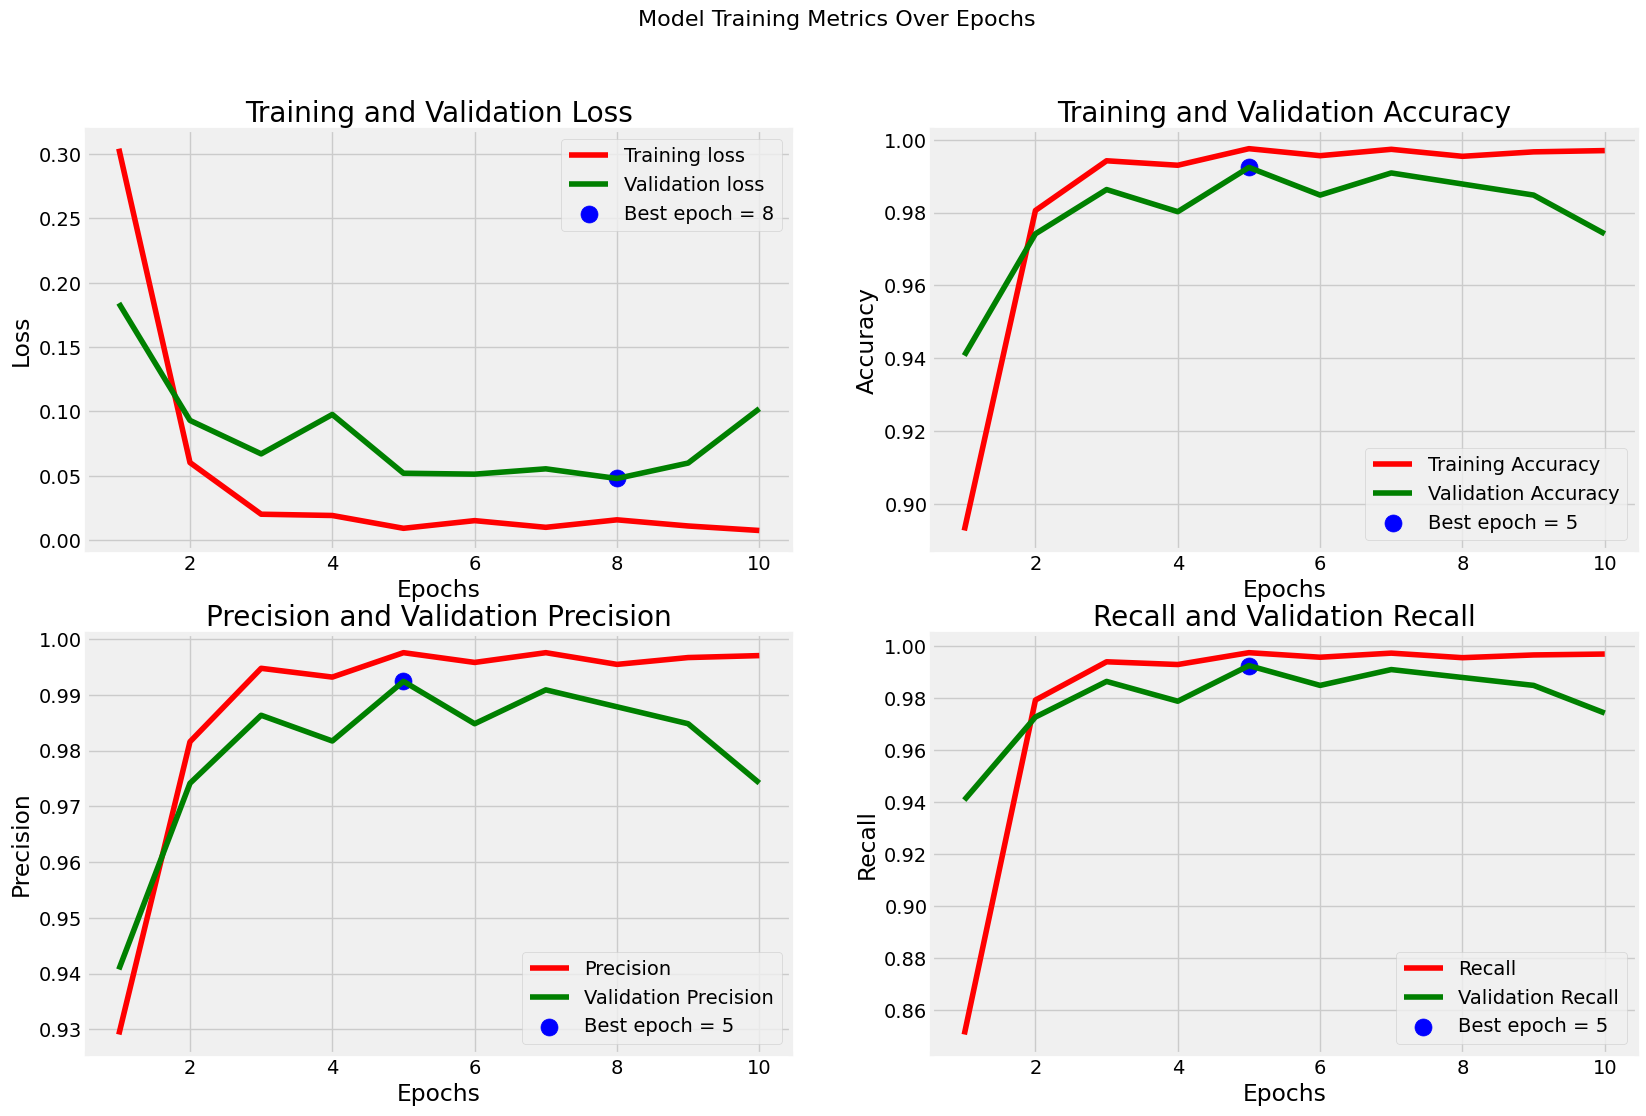

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = model.evaluate(train_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(test_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

179/179 ━━━━━━━━━━━━━━━━━━━━ 63s 353ms/step - accuracy: 0.9864 - loss: 0.0507 - precision: 0.9864 - recall: 0.9863
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.9636 - loss: 0.1997 - precision: 0.9636 - recall: 0.9636


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 516s 6s/step - accuracy: 0.9945 - loss: 0.0229 - precision: 0.9945 - recall: 0.9945
Train Loss: 0.0449
Train Accuracy: 98.69%
--------------------
Validation Loss: 0.1021
Validation Accuracy: 97.42%
--------------------
Test Loss: 0.0825
Test Accuracy: 97.64%


In [ ]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step


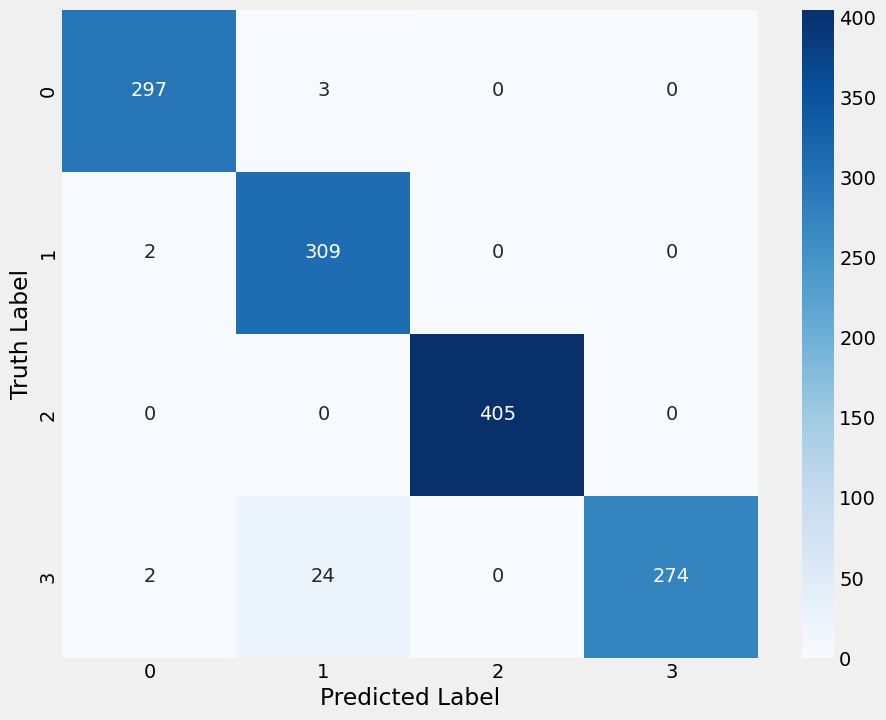

In [ ]:
#cm = confusion_matrix(test_gen.classes, y_pred)
#labels = list(class_dict.keys())
#plt.figure(figsize=(10,8))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
#plt.xlabel('Predicted Label')
#plt.ylabel('Truth Label')
#plt.show()

# Assuming your class mapping is something like this:
class_dict = {0: 'Label1', 1: 'Label2', 2: 'Label3', 3: 'Label4'}  # Replace with your actual class mapping

cm = confusion_matrix(test_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [ ]:
clr = classification_report(test_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       300
           1       0.92      0.99      0.96       311
           2       1.00      1.00      1.00       405
           3       1.00      0.91      0.95       300

    accuracy                           0.98      1316
   macro avg       0.98      0.97      0.97      1316
weighted avg       0.98      0.98      0.98      1316



In [ ]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


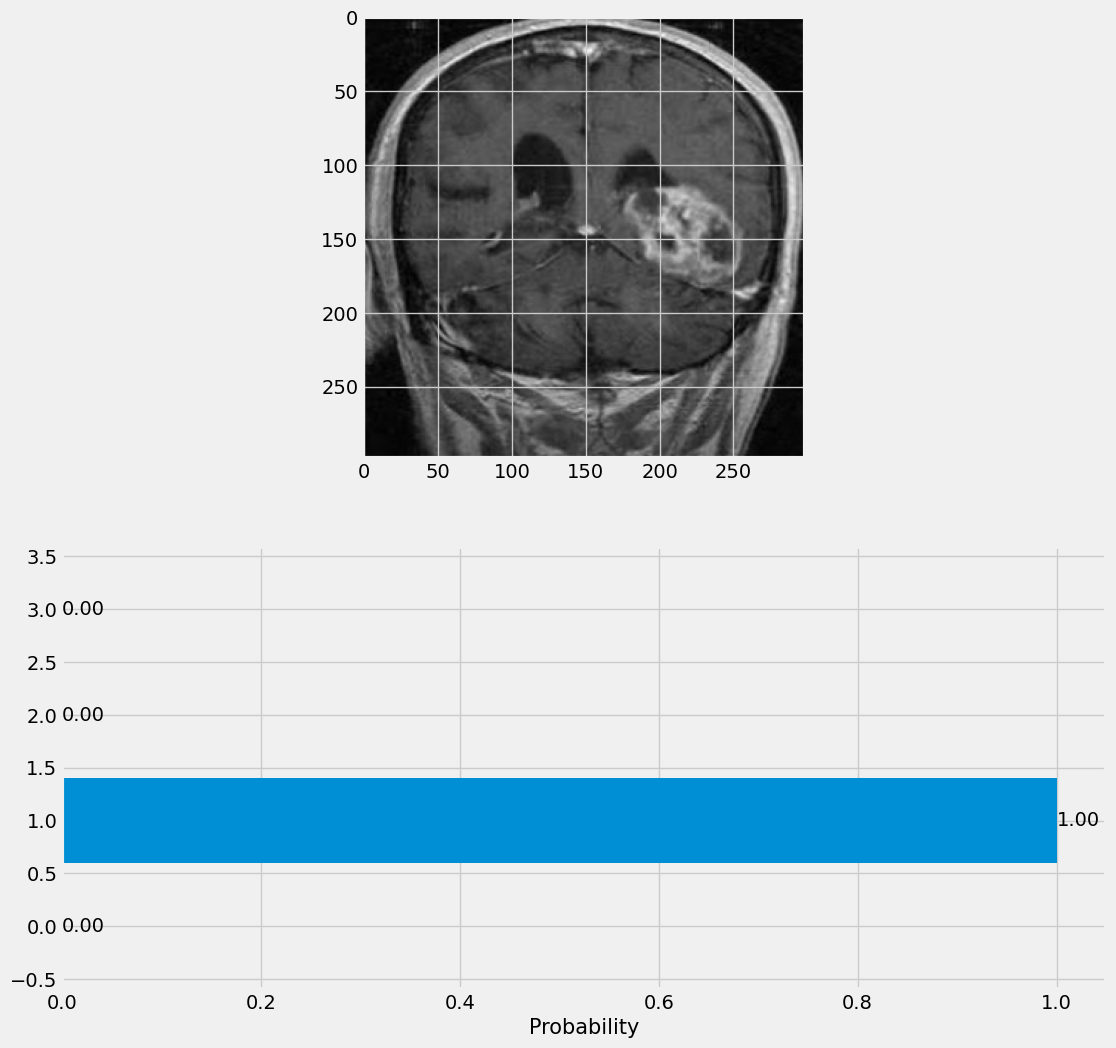

In [ ]:
predict('/content/gdrive/MyDrive/projet 2/dataset/dataset1/Testing/meningioma/Te-meTr_0007.jpg')

In [ ]:
#predict('/content/gdrive/MyDrive/projet 2/dataset/dataset1/Testing/glioma/Te-gl_0172.jpg')
predict('/content/gdrive/MyDrive/projet 2/dataset/dataset1/Testing/glioma/Te-gl_0172.jpg')

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

<Figure size 1200x1200 with 0 Axes>

In [ ]:
predict('/content/gdrive/MyDrive/projet 2/dataset/dataset1/Testing/notumor/Te-no_0374.jpg')

In [ ]:
predict('/content/gdrive/MyDrive/projet 2/dataset/dataset1/Testing/pituitary/Te-pi_0291.jpg')

In [ ]:
#model.save('med_ai_new.keras')  # This creates a directory named 'my_model'

In [ ]:
model.save('med_ai_new.h5')

In [ ]:
from google.colab import files

files.download('med_ai_new.h5')

In [ ]:
#!zip -r med_ai.zip med_ai  # Zip the directory
#files.download('med_ai_new.zip')  # Download the zipped file